In [1]:
from google.colab import files
import pickle

uploaded = files.upload()

for filename in uploaded.keys():
    with open(filename, 'rb') as f:
        if filename == 'multinomial_nb_model.pkl':
            nb_model = pickle.load(f)
        elif filename == 'random_forest_model.pkl':
            rf_model = pickle.load(f)
        elif filename == 'svm_model.pkl':
            svm_model = pickle.load(f)



Saving multinomial_nb_model.pkl to multinomial_nb_model.pkl
Saving random_forest_model.pkl to random_forest_model.pkl
Saving svm_model.pkl to svm_model.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.4.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def generate_stopwords():
    stop_words = set(stopwords.words('english'))
    return stop_words

stop_words = generate_stopwords()
print(stop_words)



{'when', 'few', 'it', 'he', 'then', 'd', 'have', 'i', 'does', "don't", "you've", 'at', 'to', 'ain', 'which', 'but', 'my', 'do', 'than', "you're", 'had', 'under', 'such', 'not', 'mustn', 'herself', "weren't", 'haven', 'will', 'each', 'can', 'yours', 'only', 'into', 'doing', 'was', 'so', "wouldn't", 'before', 'been', 'an', 'whom', "couldn't", 'won', 'its', 'itself', "isn't", 'don', 'being', 'above', 'did', 'myself', 'more', 'how', 'up', 'these', 'there', 'very', 'him', 'all', "hadn't", 'his', 'theirs', 'now', 'during', "mustn't", 'what', 'after', 'some', 'too', "should've", 'are', 'them', 'didn', 'isn', 'other', 'as', 'further', 'against', 'is', 'me', 'same', 'for', 'and', 'wasn', "won't", 'why', 'or', 'm', 'with', 'below', 'they', 's', "hasn't", 'shouldn', 'the', 'own', 'doesn', 'having', 'their', 'if', 'll', "aren't", 'she', 'wouldn', 't', 'hadn', 're', 'no', 'this', 've', 'himself', 'just', 'any', "doesn't", 'couldn', 'themselves', 'between', "you'd", 'down', "she's", 'while', 'ma', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
import pandas as pd

try:
    df = pd.read_csv("/content/preprocessed_data.csv")
except FileNotFoundError:
    print("File not found. Please check the path.")
    raise

print("Columns:", df.columns)


Columns: Index(['Text', 'Label'], dtype='object')


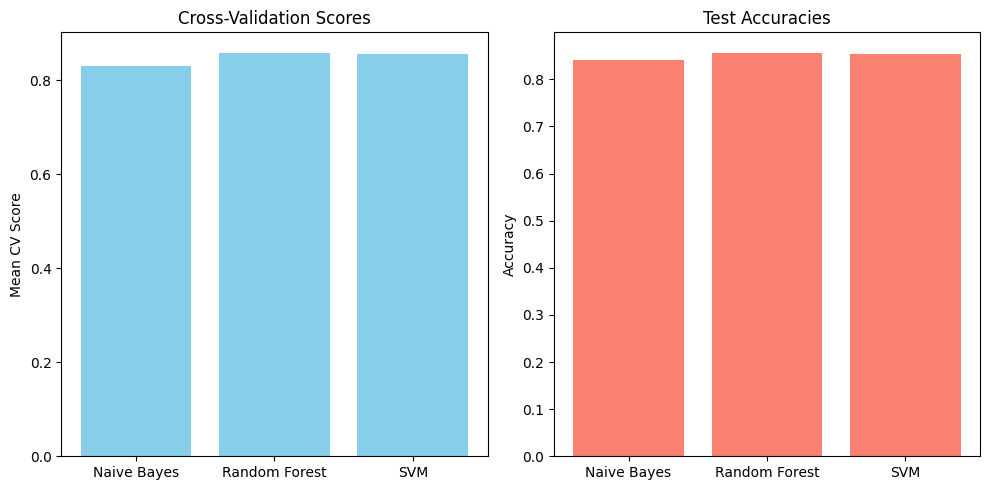

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

try:
    df = pd.read_csv("/content/preprocessed_data.csv")
except FileNotFoundError:
    print("File not found. Please check the path.")
    raise

if 'Text' not in df.columns:
    print("The 'Text' column does not exist in the DataFrame.")
    raise KeyError("Column 'Text' not found.")

if df.empty:
    print("DataFrame is empty. Please check the loaded data.")
    raise ValueError("DataFrame is empty.")

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train_vectorized, y_train)

nb_cv_scores = cross_val_score(nb_classifier, X_train_vectorized, y_train, cv=5)
rf_cv_scores = cross_val_score(rf_classifier, X_train_vectorized, y_train, cv=5)
svm_cv_scores = cross_val_score(svm_classifier, X_train_vectorized, y_train, cv=5)

nb_test_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test_vectorized))
rf_test_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test_vectorized))
svm_test_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test_vectorized))

models = ['Naive Bayes', 'Random Forest', 'SVM']
cv_scores = [nb_cv_scores.mean(), rf_cv_scores.mean(), svm_cv_scores.mean()]
test_accuracies = [nb_test_accuracy, rf_test_accuracy, svm_test_accuracy]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, cv_scores, color='skyblue')
plt.title('Cross-Validation Scores')
plt.ylabel('Mean CV Score')

plt.subplot(1, 2, 2)
plt.bar(models, test_accuracies, color='salmon')
plt.title('Test Accuracies')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


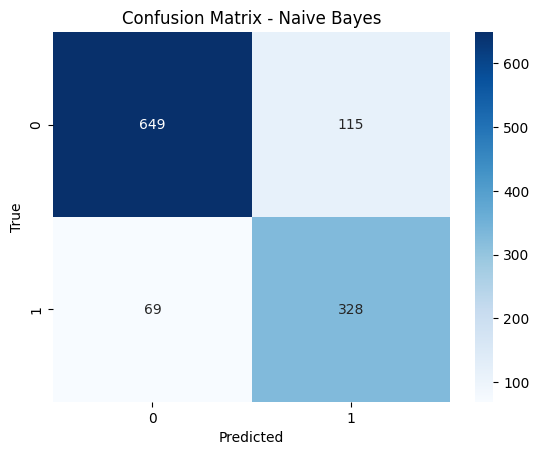

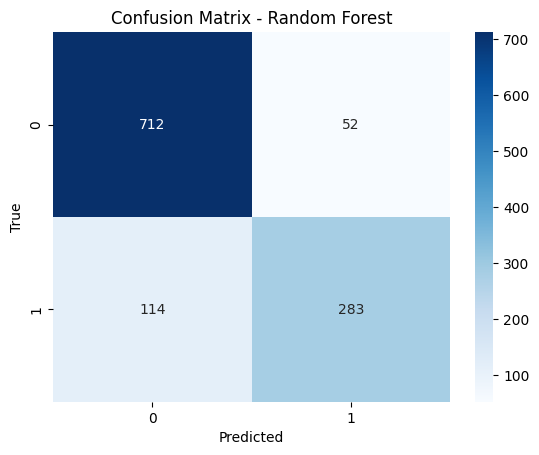

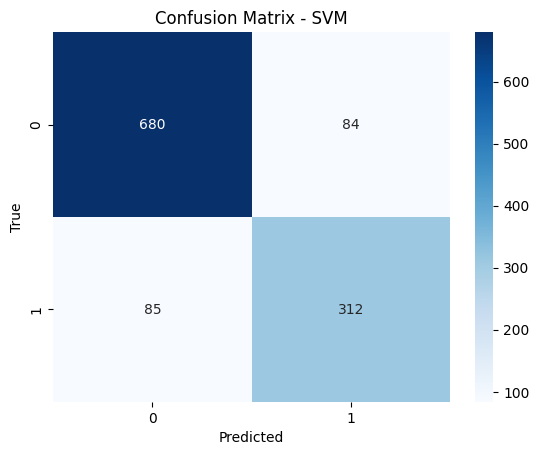

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()

try:
    df = pd.read_csv("/content/preprocessed_data.csv")
except FileNotFoundError:
    print("File not found. Please check the path.")
    raise

if 'Text' not in df.columns or 'Label' not in df.columns:
    print("The 'Text' or 'Label' column does not exist in the DataFrame.")
    raise KeyError("Column 'Text' or 'Label' not found.")

if df.empty:
    print("DataFrame is empty. Please check the loaded data.")
    raise ValueError("DataFrame is empty.")

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train_vectorized, y_train)

y_pred_nb = nb_classifier.predict(X_test_vectorized)
y_pred_rf = rf_classifier.predict(X_test_vectorized)
y_pred_svm = svm_classifier.predict(X_test_vectorized)

generate_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

generate_confusion_matrix(y_test, y_pred_rf, "Random Forest")

generate_confusion_matrix(y_test, y_pred_svm, "SVM")
